# IBGE - VEÍCULOS

In [1]:
#importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ibge_veiculos = pd.read_csv('../data/ibge-veículos.csv', low_memory=False, delimiter=',')
ibge_veiculos.set_index('Anos', inplace=True)
ibge_veiculos

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Anos,,,,,,,,,,,,,,,,,,
Veículos Gerais,226663,247963,272123,295595,319026,341097,360639,379145,393924,405042,413600,423988,435309,448730,454956,463561,472121,483879
Automóveis,165397,177774,192561,208401,224301,238407,251728,264856,274717,281779,286905,293784,300781,308290,310913,313915,316703,321770


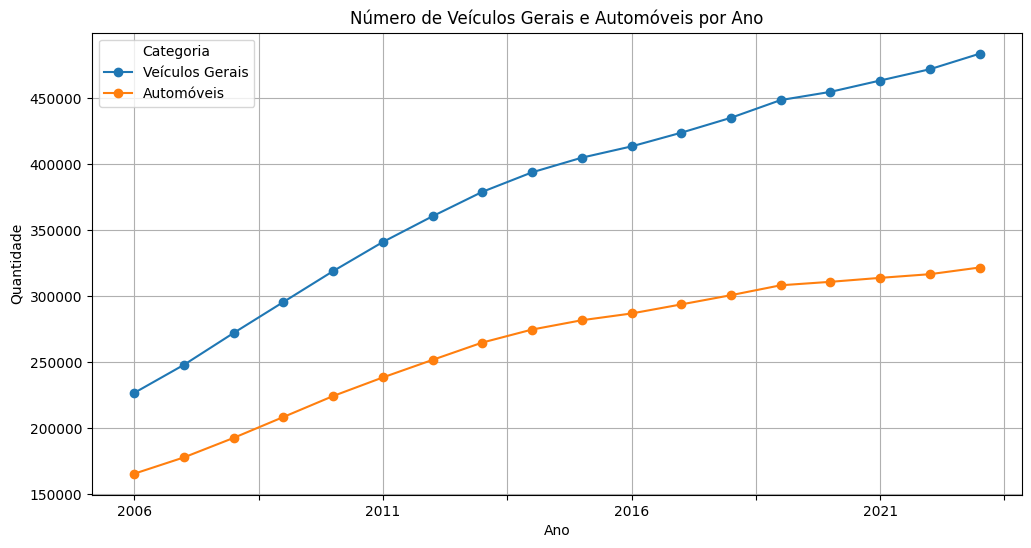

In [3]:
ibge_veiculos = ibge_veiculos.T

# Plotar os dados
ibge_veiculos.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Número de Veículos Gerais e Automóveis por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True)
plt.legend(title='Categoria')
plt.show()


In [4]:
# Resumo estatístico
summary_stats = ibge_veiculos.describe()
print(summary_stats)

Anos   Veículos Gerais     Automóveis
count        18.000000      18.000000
mean     379853.388889  262943.444444
std       80022.008230   50688.751611
min      226663.000000  165397.000000
25%      324543.750000  227827.500000
50%      399483.000000  278248.000000
75%      445374.750000  306412.750000
max      483879.000000  321770.000000


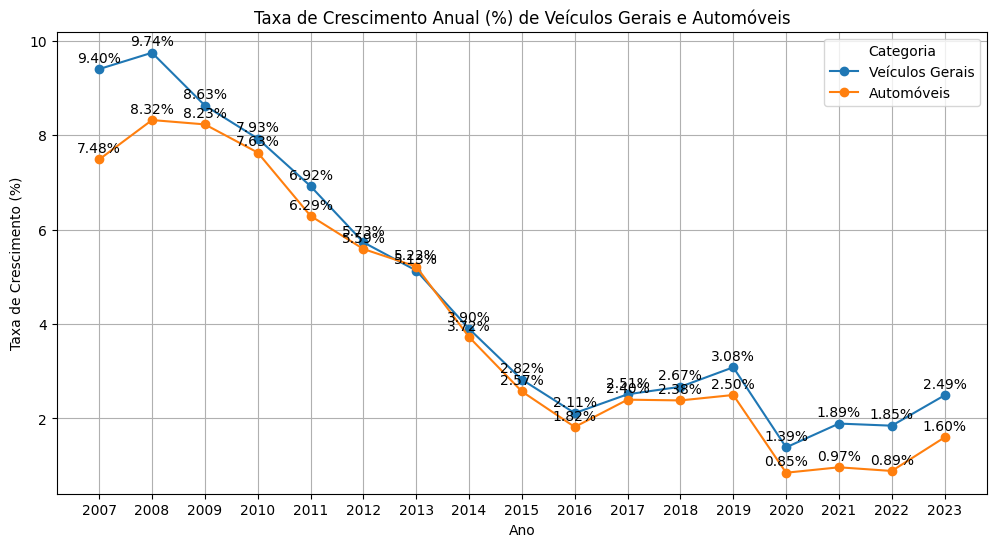

In [5]:
# Calcular a taxa de crescimento anual
growth_rate = ibge_veiculos.pct_change() * 100

# Plotar a taxa de crescimento anual
plt.figure(figsize=(12, 6))
for column in growth_rate.columns:
    plt.plot(growth_rate.index, growth_rate[column], marker='o', label=column)
    # Adicionar anotação para cada ponto
    for i, value in enumerate(growth_rate[column]):
        if not pd.isna(value):
            plt.annotate(f'{value:.2f}%', (growth_rate.index[i], growth_rate[column].iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Taxa de Crescimento Anual (%) de Veículos Gerais e Automóveis')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.grid(True)
plt.legend(title='Categoria')
plt.show()

In [ ]:
# Filtrar a taxa de crescimento dos automóveis
automoveis_growth_rate = growth_rate['Automóveis']

# Plotar a taxa de crescimento anual dos automóveis
plt.figure(figsize=(12, 6))
plt.plot(automoveis_growth_rate.index, automoveis_growth_rate, marker='o', label='Automóveis')

# Adicionar anotação para cada ponto
for i, value in enumerate(automoveis_growth_rate):
    if not pd.isna(value):
        plt.annotate(f'{value:.2f}%', (automoveis_growth_rate.index[i], automoveis_growth_rate.iloc[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('Taxa de Crescimento Anual (%) de Automóveis')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.grid(True)
plt.legend(title='Categoria')
plt.show()